<a href="https://colab.research.google.com/github/aryangoyalag/find-the-district-with-the-given-attributes/blob/main/housingProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'housing_clean_2.csv')
data.drop(['Unnamed: 0','latitude','longitude','renovation_type','apartment_type','floor','max_floor'],axis=1,inplace=True)
data.groupby(by='city_area').median()




,price,space,room,bedroom,furniture,balcony
city_area,,,,,,
Chugureti District,220800,75.00,3,2,0,1
Didube District,191100,75.00,3,2,0,1
Gldani District,135100,63.45,3,2,0,1
Isani District,164800,70.00,3,2,0,1
Krtsanisi District,214200,74.00,3,2,0,1
Mtatsminda District,445300,100.00,3,2,0,1
Nadzaladevi District,161500,68.30,3,2,0,1
Other,181850,70.00,3,2,0,1
Saburtalo District,224100,75.00,3,2,0,1


[]

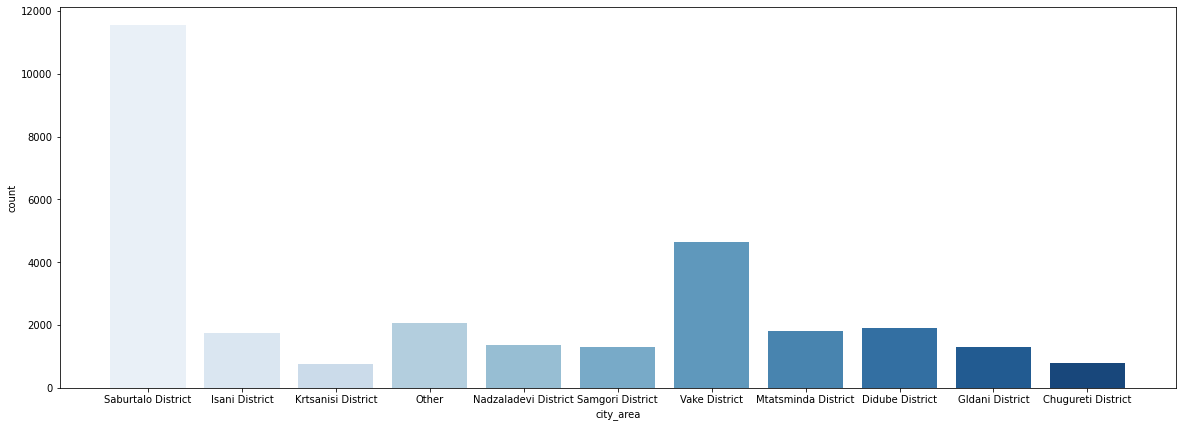

In [69]:
plt.figure(figsize=(20,7))
sns.countplot(data=data, x='city_area',palette='Blues')
plt.plot()

In [70]:
data['city_area'] = data['city_area'].map({'Chugureti District' : 0,'Didube District' : 1,	'Gldani District'	: 2,'Isani District' : 3,'Krtsanisi District' : 4,'Mtatsminda District' : 5,'Nadzaladevi District' : 6,	'Other' : 7,'Saburtalo District' : 8,'Samgori District' : 9,'Vake District':10})

data

,price,space,room,bedroom,furniture,city_area,balcony
0,107100,28.00,1,1,0,8,1
1,257000,72.00,3,1,1,3,0
2,157200,53.00,2,1,0,4,1
3,237200,80.00,3,2,0,4,1
4,158200,60.00,2,1,0,8,0
...,...,...,...,...,...,...,...
29199,179200,75.00,2,1,0,6,1
29200,126600,53.00,2,1,0,7,1
29201,62400,25.75,1,1,0,7,1
29202,167200,70.00,3,2,0,7,1


In [72]:
#now we have attributes space,room,bedroom,furniture,floor,max_floor,balcony
X = data.drop(['city_area'],axis=1)
y=data['city_area']
#z=data['price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
#X_train,X_test,z_train,z_test = train_test_split(X,z,test_size=0.2,random_state=42)

from sklearn.linear_model import LogisticRegression

model= LogisticRegression(multi_class='ovr',max_iter=1000)
model.fit(X_train,y_train)
#from sklearn.linear_model import LinearRegression
#model= LinearRegression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
score_y_train=model.score(X_train,y_train)
score_y_test=model.score(X_test,y_test)
print('Model accuracy on training set : {:.2f}%'.format(score_y_train*100))
print('Model accuracy on training set : {:.2f}%'.format(score_y_test*100))



Model accuracy on training set : 39.53%
Model accuracy on training set : 39.98%


In [84]:
data

,price,space,room,bedroom,furniture,city_area,balcony
0,107100,28.00,1,1,0,8,1
1,257000,72.00,3,1,1,3,0
2,157200,53.00,2,1,0,4,1
3,237200,80.00,3,2,0,4,1
4,158200,60.00,2,1,0,8,0
...,...,...,...,...,...,...,...
29199,179200,75.00,2,1,0,6,1
29200,126600,53.00,2,1,0,7,1
29201,62400,25.75,1,1,0,7,1
29202,167200,70.00,3,2,0,7,1


In [89]:
test_data={'price':1000000,'space':75.00,'room':2,'bedroom':1,'furniture':0,'balcony':1}

In [90]:
test = pd.Series(test_data)
prediction = model.predict([test])[0]
prediction

5